In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input,Bidirectional,LSTM,GRU,GlobalMaxPooling1D,Lambda,Concatenate, Dense
from tensorflow.keras.models import Model

In [2]:
data = pd.read_csv('mnist_data/mnist_train.csv').to_numpy()
np.random.shuffle(data)

In [3]:
X = data[:,1:].reshape(-1,28,28) / 255.0
Y = data[:,0]

In [4]:
D = 28
M = 15

In [5]:
# Enter image input and apply to RNN
input_ = Input(shape=(D,D))
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_)
x1 = GlobalMaxPooling1D()(x1)
# Rotate image input and apply to RNN
rnn2 = Bidirectional(LSTM(M, return_sequences=True))
permutor = Lambda(lambda t: K.permute_dimensions(t,pattern=(0,2,1)))
x2 = permutor(input_)
x2 = rnn2(x2)
x2 = GlobalMaxPooling1D()(x2)
# COncatenate RNN1 and RNN2
concatenator = Concatenate(axis = 1)
x = concatenator([x1,x2])
output = Dense(10, activation='Softmax')(x)
#Make model
model = Model(inputs=input_, outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 28, 28)       0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 28, 30)       5280        input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 28, 30)       5280        lambda[0][0]                     
______________________________________________________________________________________________

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
h = model.fit(X,Y, batch_size = 512, epochs = 10, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 9s 29ms/step - loss: 1.8934 - accuracy: 0.5166 - val_loss: 1.3200 - val_accuracy: 0.7442
Epoch 2/10
94/94 [==============================] - 1s 15ms/step - loss: 0.9102 - accuracy: 0.8214 - val_loss: 0.6120 - val_accuracy: 0.8715
Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.4860 - accuracy: 0.8948 - val_loss: 0.3858 - val_accuracy: 0.9122
Epoch 4/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3328 - accuracy: 0.9225 - val_loss: 0.2884 - val_accuracy: 0.9292
Epoch 5/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2609 - accuracy: 0.9357 - val_loss: 0.2376 - val_accuracy: 0.9377
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2190 - accuracy: 0.9436 - val_loss: 0.2066 - val_accuracy: 0.9448
Epoch 7/10
94/94 [==============================] - 1s 13ms/step - loss: 0.1904 - accuracy: 0.9500 - val_loss: 0.1815 - val_accuracy: 0.9522
Epoch 8/10
94

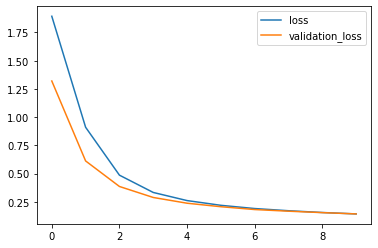

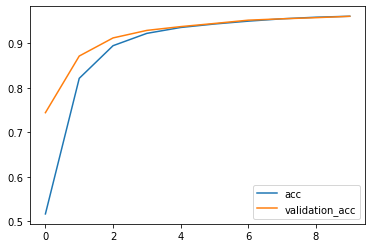

In [8]:
plt.plot(h.history['loss'],label = 'loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'],label = 'acc')
plt.plot(h.history['val_accuracy'],label = 'validation_acc')
plt.legend()
plt.show()